<h1><center>Примеры работы с VK_API</center></h1>

Все примеры взяты из Github-репозитория <a href='https://github.com/python273/vk_api/tree/6707d740ab069015ae76f3cfa1449ebe55d0a35c/examples'>vk_api</a>

Сначала импортируем необходимые библиотеки. Для установки воспользоваться командами:

- pip install vk_api

In [1]:
import collections
from pprint import pprint
from time import  sleep

import vk_api
from vk_api.longpoll import VkLongPoll, VkEventType
import matplotlib.pyplot as plt
from tqdm import tqdm

from user_data import login, password

## Аутентификация

Код взят из файла<a href='https://github.com/python273/vk_api/blob/6707d740ab069015ae76f3cfa1449ebe55d0a35c/examples/two_factor_auth.py'> two_factor_auth.py</a>. Для подключения функций API сначала необходимо выполнить вход в аккаунт.

In [2]:
def auth_handler():
    """ При двухфакторной аутентификации вызывается эта функция.
    """

    # Код двухфакторной аутентификации
    key = input("Enter authentication code: ")
    # Если: True - сохранить, False - не сохранять.
    remember_device = True

    return key, remember_device

In [3]:
#обычный вход
#vk_session = vk_api.VkApi(login, password)

#двухфакторная аутентификация
vk_session = vk_api.VkApi(login, 
                          password,# функция для обработки двухфакторной аутентификации
                          auth_handler=auth_handler,
                         )
vk_session.auth(token_only=True)
vk = vk_session.get_api()

## Получение последней записи со стены

Код взят из файла <a href='https://github.com/python273/vk_api/blob/master/examples/simple_example.py'>simple_example.py</a>. В этом примере используется метод <a href='https://vk.com/dev/wall.get'>wall.get</a> с параметром count = 1, т.е. мы получаем один последний пост со стены текущего пользователя. 

In [4]:
response = vk.wall.get(count=1)  # Используем метод wall.get

if response['items']:
    pprint(response['items'][0])

{'attachments': [{'photo': {'access_key': 'eb7da935b348c5e600',
                            'album_id': -7,
                            'date': 1530553925,
                            'id': 456240073,
                            'owner_id': 225189522,
                            'sizes': [{'height': 97,
                                       'type': 'm',
                                       'url': 'https://pp.userapi.com/c850036/v850036356/1b26a/jp7gTs8YvA8.jpg',
                                       'width': 130},
                                      {'height': 98,
                                       'type': 'o',
                                       'url': 'https://pp.userapi.com/c850036/v850036356/1b26f/JHPCUj0nAh8.jpg',
                                       'width': 130},
                                      {'height': 150,
                                       'type': 'p',
                                       'url': 'https://pp.userapi.com/c850036/v850036356/1b270/vfo

                                       'url': 'https://pp.userapi.com/c850036/v850036356/1b293/sWdE8xGkZZg.jpg',
                                       'width': 1215},
                                      {'height': 604,
                                       'type': 'x',
                                       'url': 'https://pp.userapi.com/c850036/v850036356/1b290/8JWxMPjLzis.jpg',
                                       'width': 340},
                                      {'height': 807,
                                       'type': 'y',
                                       'url': 'https://pp.userapi.com/c850036/v850036356/1b291/-sH_1t2XtTU.jpg',
                                       'width': 454},
                                      {'height': 1080,
                                       'type': 'z',
                                       'url': 'https://pp.userapi.com/c850036/v850036356/1b292/s93rAOcigXU.jpg',
                                       'width': 607}],
           

                                       'url': 'https://pp.userapi.com/c850036/v850036356/1b2b7/GQEfFI1R7tA.jpg',
                                       'width': 200},
                                      {'height': 213,
                                       'type': 'q',
                                       'url': 'https://pp.userapi.com/c850036/v850036356/1b2b8/2digHOqtwEI.jpg',
                                       'width': 320},
                                      {'height': 340,
                                       'type': 'r',
                                       'url': 'https://pp.userapi.com/c850036/v850036356/1b2b9/c4F9Vc9M33E.jpg',
                                       'width': 510},
                                      {'height': 42,
                                       'type': 's',
                                       'url': 'https://pp.userapi.com/c850036/v850036356/1b2b0/xEaRhExLwMg.jpg',
                                       'width': 75},
                

Получим последние 100 постов со стены сообществ из топ10 популярных сообществ по версии https://allsocial.ru Выведем графики количества лайков и просмотров записей.

In [5]:
ids = [-43215063, -22798006, -26419239,
       -45441631, -57846937, -12382740,
       -22822305, -58170807, -31836774,
       -23064236]
data = []
names = []
for id_ in tqdm(ids):
    response = vk.wall.get(owner_id=id_, extended=1, fields='name', count=100)  
    views = [post['views']['count'] for post in response['items'] if 'views' in post][::-1]
    likes = [post['likes']['count'] for post in response['items']][::-1]
    data.append([views, likes])
    names.append(response['groups'][0]['name'])
    sleep(0.3)

100%|████████████████████████████████████████| 10/10 [00:08<00:00,  1.28it/s]


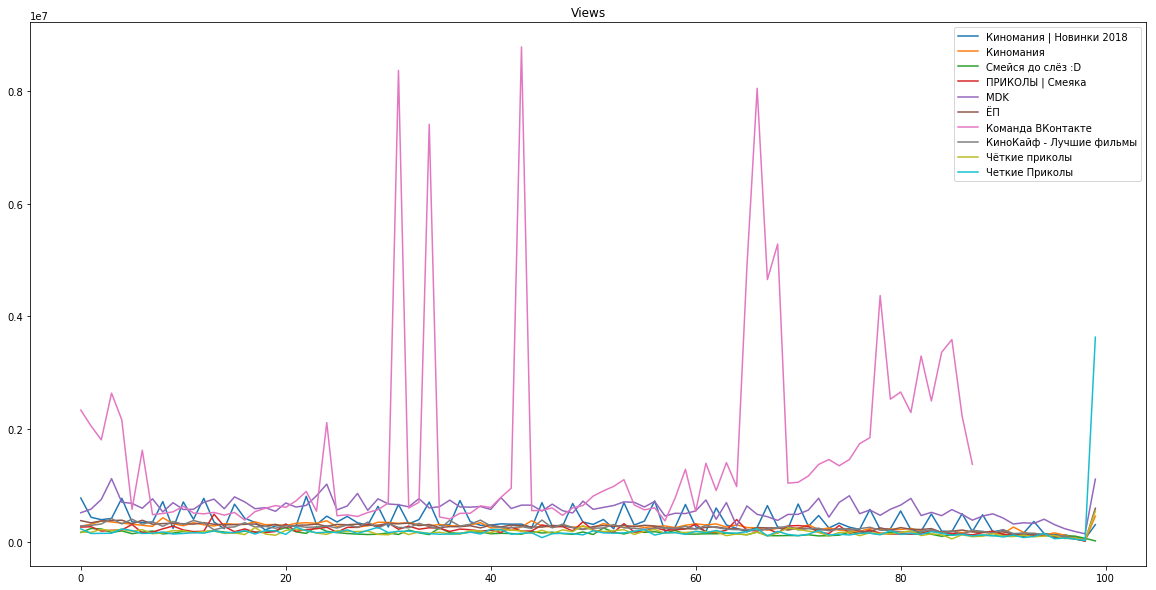

In [6]:
plt.figure(figsize=(20,10))

plt.title('Views')
for d , name in zip(data, names):
    plt.plot(d[0], label=name)
plt.legend();

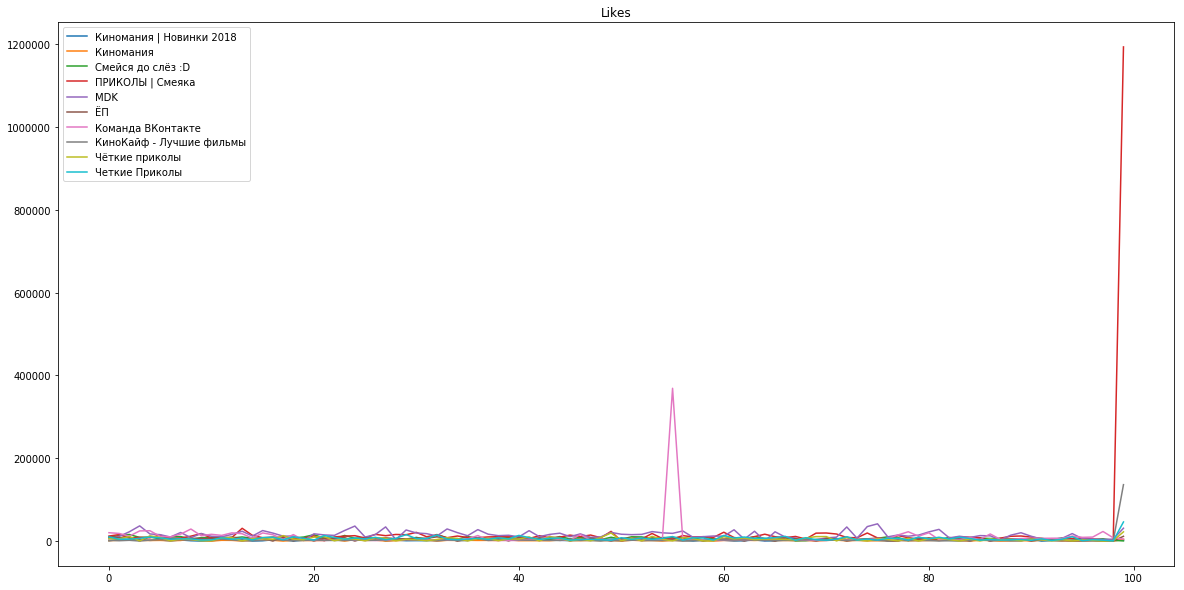

In [7]:
plt.figure(figsize=(20,10))

plt.title('Likes')
for d , name in zip(data, names):
    plt.plot(d[1], label=name)
plt.legend();

## User Long Poll API

Пример использования longpoll.

https://vk.com/dev/using_longpoll

https://vk.com/dev/using_longpoll_2

Код был взят из файла <a href='https://github.com/python273/vk_api/blob/master/examples/longpoll.py'>longpoll.py</a>

In [111]:
longpoll = VkLongPoll(vk_session)

for event in longpoll.listen():

    if event.type == VkEventType.MESSAGE_NEW:
        print('Новое сообщение:')

        if event.from_me:
            print('От меня для: ', end='')
        elif event.to_me:
            print('Для меня от: ', end='')

        if event.from_user:
            print(event.user_id)
        elif event.from_chat:
            print(event.user_id, 'в беседе', event.chat_id)
        elif event.from_group:
            print('группы', event.group_id)

        print('Текст: ', event.text)
        print()

    elif event.type == VkEventType.USER_TYPING:
        print('Печатает ', end='')

        if event.from_user:
            print(event.user_id)
        elif event.from_group:
            print('администратор группы', event.group_id)

    elif event.type == VkEventType.USER_TYPING_IN_CHAT:
        print('Печатает ', event.user_id, 'в беседе', event.chat_id)

    elif event.type == VkEventType.USER_ONLINE:
        print('Пользователь', event.user_id, 'онлайн', event.platform)

    elif event.type == VkEventType.USER_OFFLINE:
        print('Пользователь', event.user_id, 'оффлайн', event.offline_type)

    else:
        print(event.type, event.raw[1:])


Пользователь 49073628 онлайн VkPlatform.IPHONE
Пользователь 210817413 оффлайн VkOfflineType.EXIT
Пользователь 209269528 оффлайн VkOfflineType.AWAY
VkEventType.READ_ALL_INCOMING_MESSAGES [2000000053, 95974, 0]
VkEventType.MESSAGES_COUNTER_UPDATE [0, 0]
Пользователь 72292628 онлайн VkPlatform.ANDROID
Пользователь 102626691 онлайн VkPlatform.ANDROID
Пользователь 187163549 оффлайн VkOfflineType.EXIT
Пользователь 210817413 онлайн VkPlatform.ANDROID
Пользователь 152583659 онлайн VkPlatform.WEB
Новое сообщение:
Для меня от: 225189522
Текст:  ПРивет

VkEventType.MESSAGES_COUNTER_UPDATE [1, 0]
VkEventType.READ_ALL_INCOMING_MESSAGES [225189522, 95975, 0]
VkEventType.MESSAGES_COUNTER_UPDATE [0, 0]
Пользователь 469709232 оффлайн VkOfflineType.AWAY
Пользователь 236397106 онлайн VkPlatform.IPHONE
Пользователь 63657052 оффлайн VkOfflineType.AWAY
Пользователь 102626691 оффлайн VkOfflineType.EXIT
Пользователь 243849087 оффлайн VkOfflineType.AWAY
Пользователь 310639377 оффлайн VkOfflineType.AWAY
Пользов

KeyboardInterrupt: 

## Работа с альбомами

Код был взят из файла <a href='https://github.com/python273/vk_api/blob/master/examples/upload_photo.py'>upload_photo.py</a>. 

Сначала создадим приватный альбом через функцию <a href='https://vk.com/dev/photos.createAlbum'>photos.createAlbum</a>.

In [8]:
response = vk.photos.createAlbum(title='VK_API', 
                     privacy_view='only_me',
                     privacy_comment='only_me',
                     )
response

{'id': 257485152,
 'thumb_id': 0,
 'owner_id': 225189522,
 'title': 'VK_API',
 'description': '',
 'created': 1540563071,
 'updated': 1540563071,
 'size': 0,
 'privacy_view': ['only_me'],
 'privacy_comment': ['only_me']}

Получим идентификатор альбома.

In [9]:
album_id = response['id']
album_id

257485152

В VkUpload реализованы методы загрузки файлов в ВК

In [10]:
upload = vk_api.VkUpload(vk_session)

photo = upload.photo('photo.jpg',
                     album_id=album_id
)

vk_photo_url = 'https://vk.com/photo{}_{}'.format(photo[0]['owner_id'], 
                                                  photo[0]['id'],
                                                 )

print('\nLink: ', vk_photo_url)
pprint(photo)


Link:  https://vk.com/photo225189522_456240166
[{'album_id': 257485152,
  'date': 1540563076,
  'id': 456240166,
  'owner_id': 225189522,
  'sizes': [{'height': 48,
             'type': 's',
             'url': 'https://pp.userapi.com/c846320/v846320670/118d9e/Tl3wKUqwGaA.jpg',
             'width': 75},
            {'height': 83,
             'type': 'm',
             'url': 'https://pp.userapi.com/c846320/v846320670/118d9f/A6BsMTker_k.jpg',
             'width': 130},
            {'height': 384,
             'type': 'x',
             'url': 'https://pp.userapi.com/c846320/v846320670/118da0/GdkZiYWDYeI.jpg',
             'width': 604},
            {'height': 513,
             'type': 'y',
             'url': 'https://pp.userapi.com/c846320/v846320670/118da1/cj3Z-_10xO4.jpg',
             'width': 807},
            {'height': 614,
             'type': 'z',
             'url': 'https://pp.userapi.com/c846320/v846320670/118da2/PbcqbSC6AcQ.jpg',
             'width': 966},
            {'

Теперь можно удалить альбом через функцию <a href='https://vk.com/dev/photos.deleteAlbum'>photos.deleteAlbum</a>.

In [11]:
vk.photos.deleteAlbum(album_id=album_id)

1